In [29]:
import numpy as np
import seaborn as sn
from keras.utils import to_categorical
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import collections
from collections import Counter
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
import os
import cv2
from PIL import Image
from pathlib import Path
import time
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score

In [55]:
train_path = "traffic_sign_data//Train//"
test_path = "traffic_sign_data//Test//"
test_label_path = "traffic_sign_data//Test.csv"
meta_path = "traffic_sign_data//Meta"

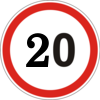

In [67]:
image_label_0 = "//0.png"
img_0 = Image.open("traffic_sign_data//Meta" + image_label_0)
img_0

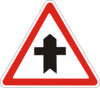

In [68]:
image_label_11 = "//11.png"
img_11 = Image.open("traffic_sign_data//Meta" + image_label_11)
img_11

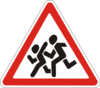

In [69]:
image_label_28 = "//28.png"
img_28 = Image.open("traffic_sign_data//Meta" + image_label_28)
img_28

In [32]:
# read in train images and respective labels

start = time.time()

dir_list = os.listdir(train_path)
train_images = []
train_label = []
    
for i in range(len(dir_list)):
    actual_label = dir_list[i]
    actual_path = train_path + str(dir_list[i])
    pathlist = Path(actual_path).glob('**/*.png')

    for path in pathlist:
        path_in_str = str(path)
        img = Image.open(path_in_str)
        img = img.resize((32,32))
        img = np.asanyarray(img)
        train_images.append(img)
        train_label.append(actual_label)

arr_train_images = np.asanyarray(train_images)
arr_train_label = np.asanyarray(train_label)
print(arr_train_images.shape)
print(arr_train_label.shape)

end = time.time()

print("Time taken: ", round(end-start, 0), "seconds")

(39209, 32, 32, 3)
(39209,)
Time taken:  13.0 seconds


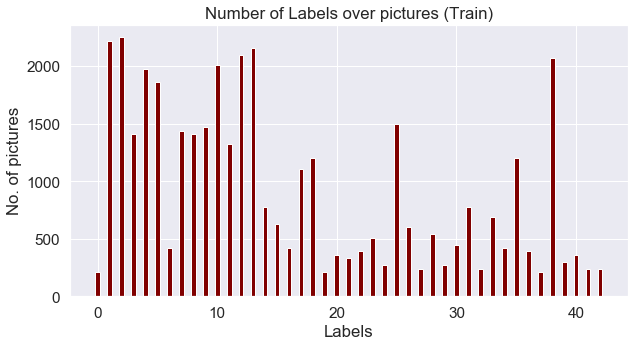

In [34]:
train_label_dict = Counter(train_label)

label = []
count = []
for i in range (len(train_label_dict.keys())):
    label.append(i)
    value = train_label_dict.get(str(i))
    count.append(value)

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(label, count, color ='maroon', 
        width = 0.4)
 
plt.xlabel("Labels")
plt.ylabel("No. of pictures")
plt.title("Number of Labels over pictures (Train)")
plt.show()    

In [35]:
# get test labels

df = pd.read_csv(test_label_path)

df = df["ClassId"]
test_label = df.values

arr_test_label = np.asanyarray(test_label)
print(arr_test_label.shape)

(12630,)


In [36]:


start = time.time()

pathlist_test = Path(test_path).glob('**/*.png')

test_images = []

for path in pathlist_test:
    path_in_str = str(path)
    img = Image.open(path_in_str)
    img = img.resize((32,32))
    img = np.asanyarray(img)
    test_images.append(img)
    
arr_test_images = np.asanyarray(test_images)
print(arr_test_images.shape)

end = time.time()
print("Time taken: ", round(end-start, 0), "seconds")

(12630, 32, 32, 3)
Time taken:  4.0 seconds


In [37]:
X_train, y_train = shuffle(arr_train_images, arr_train_label, random_state=20)
X_test, y_test = shuffle(arr_test_images, arr_test_label, random_state=20)

In [38]:
y_train = to_categorical(y_train, num_classes = len(dir_list))
y_test = to_categorical(y_test, num_classes = len(dir_list))

In [43]:
X_train = X_train.astype(np.float32)/255.
X_test = X_test.astype(np.float32)/255.

In [16]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(32, 32, 3), padding = "same"))
model.add(Conv2D(32, kernel_size=(3, 3), activation="relu", padding = "same"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3, 3), activation="relu", padding = "same"))
model.add(Conv2D(64, kernel_size=(3, 3), activation="relu", padding = "same"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation="relu", padding = "same"))
model.add(Conv2D(128, kernel_size=(3, 3), activation="relu", padding = "same"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(256, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(128, activation="relu"))
model.add(Dense(43, activation="softmax"))

#activation: softmax, sigmoid
#optimizer: adam, sgd

model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

model.fit(
    X_train,
    y_train,
    epochs=20,
    batch_size=130)

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/20
39209/39209 [==============================] - 107s 3ms/step - loss: 2.8080 - acc: 0.2143
Epoch 2/20
39209/39209 [==============================] - 114s 3ms/step - loss: 1.0224 - acc: 0.6634
Epoch 3/20
39209/39209 [==============================] - 117s 3ms/step - loss: 0.3625 - acc: 0.8839
Epoch 4/20
39209/39209 [==============================] - 117s 3ms/step - loss: 0.2000 - acc: 0.9366
Epoch 5/20
39209/39209 [==============================] - 117s 3ms/step - loss: 0.1321 - acc: 0.9596
Epoch 6/20
39209/39209 [==============================] - 108s 3ms/step - loss: 0.1004 - acc: 0.9694
Epoch 7/20
39209/39209 [==============================] - 108s 3ms/step - loss: 0.0799 - acc: 0.9762
Epoch 8/20
39209/39209 [==============================] - 

In [23]:
model.evaluate(X_train, y_train)

39209/39209 [==============================] - 38s 980us/step


[0.010231086579218174, 0.9975770868933153]

In [44]:
model.evaluate(X_test, y_test)

12630/12630 [==============================] - 11s 911us/step


[0.19685391679052516, 0.9649247822644498]

In [53]:
accuracy_score(y_test, y_pred)

0.9649247822644498

In [46]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred,axis = 1)
y_test = np.argmax(y_test,axis = 1)

In [47]:
conf = confusion_matrix(y_test, y_pred)

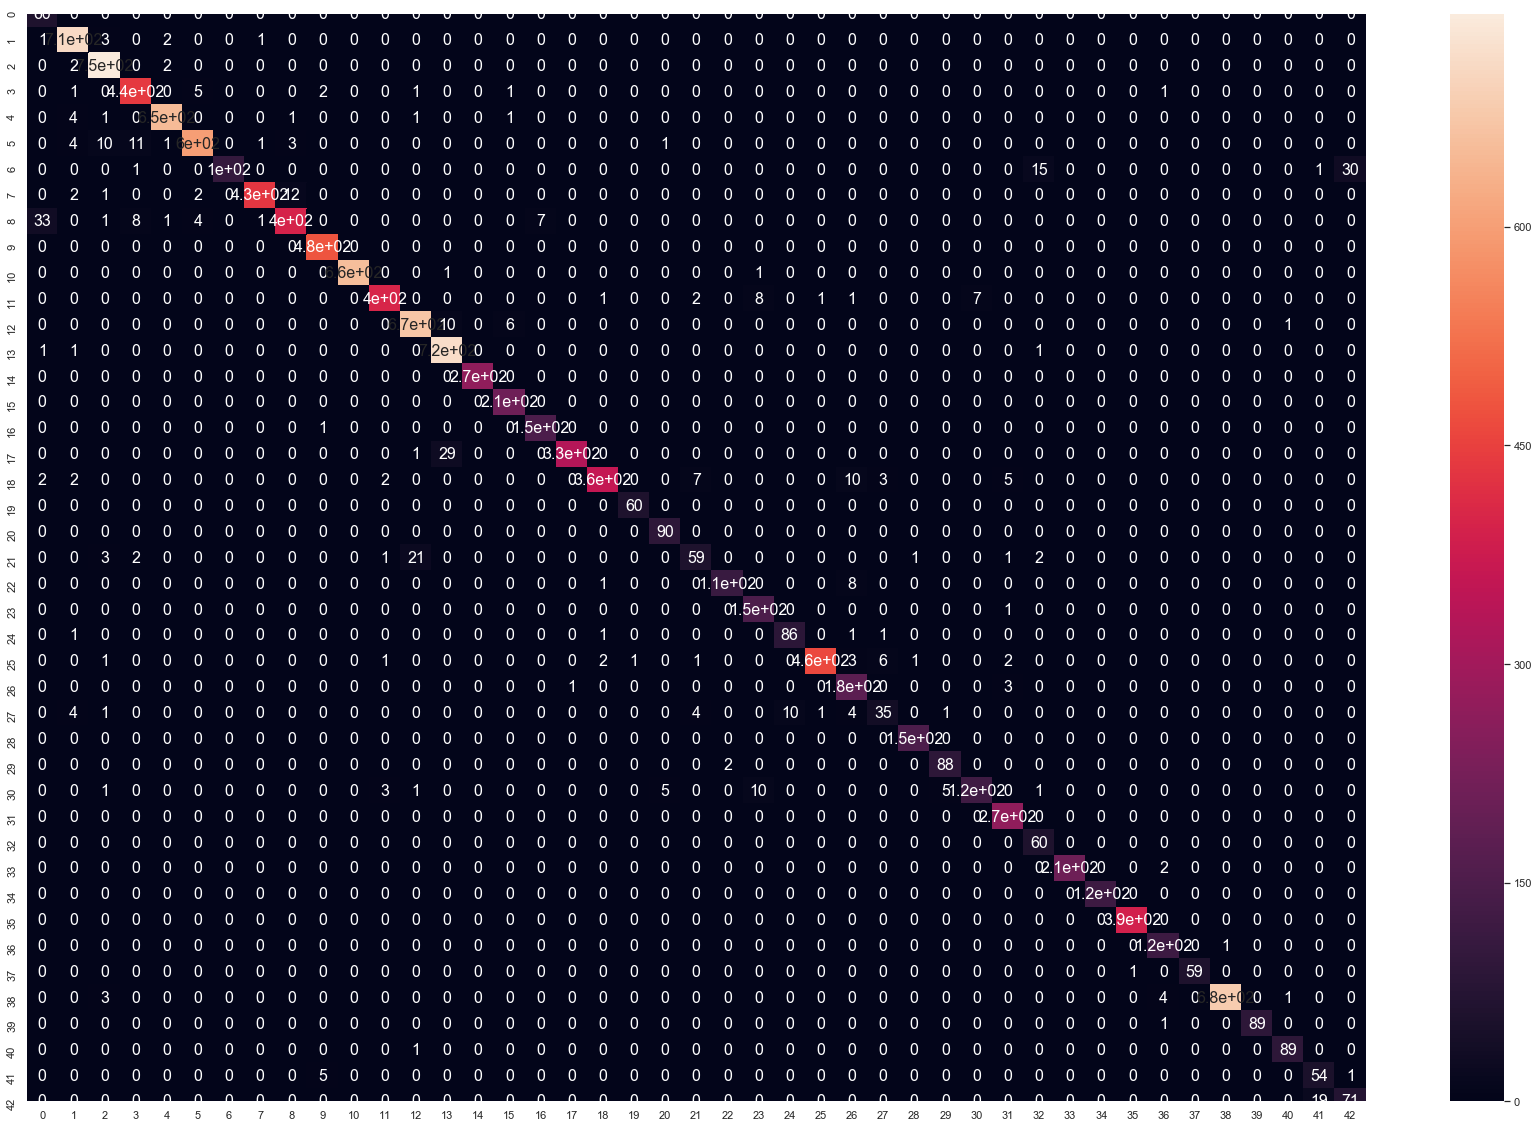

In [52]:
df_cm = pd.DataFrame(conf, range(43), range(43))
plt.figure(figsize=(30,20))
sn.set(font_scale=1) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()